# Métodos de Runge-Kutta aplicados al sistema masa resorte amortiguador

Los siguientes programas escritos en python son rutinas para la solución de las ecuaciones diferenciales que describen al sistema mecánico vibratorio.

```{warning}
<div align='justify'>
Es posible ejecutar el código de los bloques siguientes pero con la precaución de ejecutarlos en el orden en el que aparacen en esta página, haciendo click en el ícono del cohete, esperar a que se establezca conexión con el kernel online de python y posteriormente dando click en la pestaña RUN y posteriormente la opción Live Code.
</div>

```

In [2]:
# Importación de las librerías necesarias.
from __future__ import division, absolute_import, print_function
import csv
import serial   # Necesario para la cuminicación serrial
import array    # una variable arreglo para almacenar los datos recibidos
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np

## Método de Runge-Kutta de segundo orden

El método de Runge-Kutta para resolver la ecuación diferencial de segundo orden {eq}`MBKeq1`

```{math}
:label: RKMBKeq4
\begin{eqnarray}
	x_{1_{i+1}}&=x_{1_{i+1}}+h\left( \frac{1}{2}k_{11}+\frac{1}{2}k_{12} \right)\\
    x_{2_{i+1}}&=x_{2_{i}}+h\left(\frac{1}{2}k_{21}+\frac{1}{2}k_{22} \right)
	\end{eqnarray}
```
con:

```{math}
:label: RKMBKeq5
\begin{eqnarray}
	&k_{12}=-\frac{b}{m}x_{2_{i}}-\frac{k}{m}x_{1_{i}}\\
    &k_{11}=x_{2_{i}}\\
    k_{22}&=-\frac{b}{m}(x_{2_{i}}+hk_{11})-\frac{k}{m}(x_{1_{i}}+hk_{12})\\
    &k_{21}=x_{2_{i}}+hk_{11})
	\end{eqnarray}
```

El código siguiente, escrito en pyhton permite resolver de forma iterativa el conjunto de ecuaciones de primer orden de la representación en el espacio de estados del modelo matemático del circuito RLC serie. El paso de integación se define como  ℎ
 .

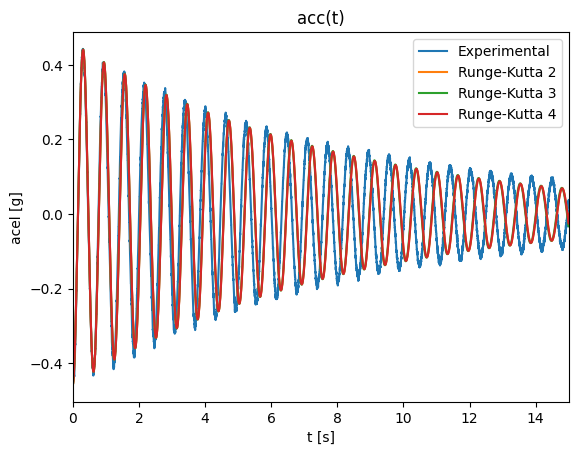

In [8]:
%matplotlib inline
xs=[]
ys=[]
zs=[]


with open('accPayaso_2','r') as csvfile:    
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        xs.append(float(row[0]))
        ys.append(float(row[1]))
        zs.append(float(row[2]))



ts=np.empty(np.size(xs),dtype=float);

i=0;
for i in range(np.size(xs)):
    ts[i]=i*0.001;
    i=i+1;
    

p0=0.045;            #
v0=0.0;            # Condiciones iniciales
A=0;             # 
U0=A;            # 
#R = 1450;
m = 43/1000; 
b =0.0115;
k = 4.3;  

h=1/10000;         # Ancho del paso 
N=int(15/h);    # Número total de pasos

p2=np.empty([N+1],dtype=float);
v2=np.empty([N+1],dtype=float);
acc2=np.empty([N+1],dtype=float);

p3=np.empty([N+1],dtype=float);
v3=np.empty([N+1],dtype=float);
acc3=np.empty([N+1],dtype=float);

p4=np.empty([N+1],dtype=float);
v4=np.empty([N+1],dtype=float);
acc4=np.empty([N+1],dtype=float);

tr=np.empty([N+1],dtype=float);
U=np.empty([N+1],dtype=float);

tr[0]=0;         # 
p2[0]=p0;        # Condiciones iniciales
v2[0]=v0;        # 
v3[0]=0.0;
U[0]=U0;
p3[0]=p0;        # Condiciones iniciales
v4[0]=v0;
p4[0]=p0;
acc2[0]=-9.81*0
acc3[0]=0
acc4[0]=0
n=0
for n in range(N):
    tr[n+1]=n*h;
    U[n]=6.38*0;
    U[n+1]=6.38*0;
 
    # método Runge-Kutta 2do orden 
    k11=v2[n]
    k12=-b/m*v2[n]-k/m*p2[n]+1/m*U[n];   

    k21=(v2[n]+h*k11);
    k22=-b/m*(v2[n]+h*k11)-k/m*(p2[n]+h*k12)+1/m*U[n];

    p2[n+1]=p2[n]+h*(0.5*k11+0.5*k21);
    v2[n+1]=v2[n]+h*(0.5*k12+0.5*k22);
    acc2[n]=-(b/m)*v2[n]-(k/m)*p2[n]+1/m*U[n];

    # método Runge-Kutta 3er orden 
    k11=v3[n]
    k12=-b/m*v3[n]-k/m*p3[n]+1/m*U[n]; 

    k21=v3[n]+0.5*h;
    k22=-b/m*(v3[n]+0.5*h)-k/m*(p3[n]+0.5*h)+1/m*U[n];

    k31=v3[n]+h;
    k32=-b/m*(v3[n]+h)-k/m*(p3[n]-h*k21+2*h*k22)+1/m*U[n];
    
    p3[n+1]=p3[n]+(1/6)*h*(k11+4*k21+k31);
    v3[n+1]=v3[n]+(1/6)*h*(k12+4*k22+k32);
    acc3[n]=-(b/m)*v3[n]-(k/m)*p3[n]+1/m*U[n];

    # método Runge-Kutta 4to orden 
    k11=v4[n]
    k12=-b/m*v4[n]-k/m*p4[n]+1/m*U[n];

    k21=v4[n]+0.5*h;
    k22=-b/m*(v4[n]+0.5*h)-k/m*(p4[n]+0.5*h*k12)+1/m*U[n];
    
    k31=v4[n]+0.5*h;
    k32=-b/m*(v4[n]+0.5*h)-k/m*(p4[n]+0.5*h*k22)+1/m*U[n];
    
    k41=v4[n]+h;
    k42=-b/m*(v4[n]+h)-k/m*(p4[n]+h*k32)+1/m*U[n];
  
    p4[n+1]=p4[n]+(1/6)*h*(k11+2*k21+2*k31+k41);
    v4[n+1]=v4[n]+(1/6)*h*(k12+2*k22+2*k32+k42);
    acc4[n]=-(b/m)*v4[n]-(k/m)*p4[n]+1/m*U[n]

     
    n=n+1;
    
plt.plot(ts-1.276,((zs-np.mean(zs))*3.3/4096)/0.33)
plt.plot(tr,acc2/9.81)
plt.plot(tr,acc3/9.81)
plt.plot(tr,acc4/9.81)


plt.xlim(0,15)

plt.title('acc(t)')
plt.xlabel('t [s]')
plt.ylabel('acel [g]')
plt.legend(["Experimental","Runge-Kutta 2","Runge-Kutta 3","Runge-Kutta 4"], numpoints=1,loc=0);






::::{important}
<div align='justify'>
En este sistema, es necesario dar condiciones iniciales al sistema. Basta con estirar un poco el resorte y soltar el juguete. Es más complicado sincronizar la medición por que el inicio es manual.
Hay una cantidad considerablemente mayor de variables y dinámicas no modeladas.
</div>
::::

```{figure} /images/Imagen21.png
:height: 250px
:name: RKMBKfig1
```